In [83]:
import pandas as pd
import numpy as np

In [84]:
train_data=pd.read_csv("../data/train_synth_data.csv")
test_data=pd.read_csv("../data/test_synth_data.csv")

In [85]:
from sklearn.model_selection import train_test_split

# shuffle data
df = train_data.sample(frac=1, random_state=4266)
# Perform a train-test split
train_ratio = 0.8  # Adjust this ratio as needed
train_size = int(len(df) * train_ratio)

train_data = df[:train_size]
valid_data = df[train_size:]

In [89]:
test_data

,transcript_id,transcript_position,gene_id,label,dwell_time_-1,sd_-1,mean_-1,dwell_time_0,sd_0,mean_0,...,5-mer-1_G,5-mer-2_A,5-mer-2_G,5-mer-5_A,5-mer-5_C,5-mer-5_T,5-mer-6_A,5-mer-6_C,5-mer-6_T,5-mer-6_G
0,ENST00000429711,148,ENSG00000144713,0,0.010216,6.895889,132.951417,0.006676,4.237490,95.638057,...,1,1,0,0,1,0,1,0,0,0
1,ENST00000523944,2085,ENSG00000104738,0,0.007200,3.947843,118.058824,0.007439,6.113137,120.607843,...,1,0,1,0,1,0,0,1,0,0
2,ENST00000582730,1946,ENSG00000136450,0,0.008813,4.434474,102.891447,0.007550,6.304868,124.184211,...,0,0,1,0,0,1,0,0,0,1
3,ENST00000306125,1111,ENSG00000172053,0,0.008166,7.344167,131.200000,0.010954,4.223333,104.300000,...,1,1,0,0,0,1,1,0,0,0
4,ENST00000376759,109,ENSG00000102317,0,0.009987,1.540525,90.176271,0.009452,1.982814,93.570339,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24363,ENST00000301964,760,ENSG00000171148,0,0.008328,2.553851,106.659574,0.005866,3.686809,100.019149,...,0,1,0,0,1,0,0,1,0,0
24364,ENST00000394366,516,ENSG00000100650,0,0.008927,7.611071,120.107143,0.007853,2.980714,97.246429,...,1,1,0,1,0,0,0,0,1,0
24365,ENST00000337387,1241,ENSG00000146457,0,0.005336,1.654974,90.678947,0.006570,2.322632,94.926316,...,0,1,0,0,1,0,1,0,0,0
24366,ENST00000356663,1960,ENSG00000182087,0,0.007976,3.375405,107.994595,0.006756,6.224865,118.918919,...,0,0,1,1,0,0,0,1,0,0


In [90]:
X_train_pos,X_train_stats,y_train=train_data[['5-mer-0_A', '5-mer-0_C', '5-mer-0_T',
       '5-mer-0_G', '5-mer-1_A', '5-mer-1_T', '5-mer-1_G', '5-mer-2_A',
       '5-mer-2_G', '5-mer-5_A', '5-mer-5_C', '5-mer-5_T', '5-mer-6_A',
       '5-mer-6_C', '5-mer-6_T', '5-mer-6_G']],train_data[['dwell_time_-1', 'sd_-1', 'mean_-1', 'dwell_time_0', 'sd_0', 'mean_0',
       'dwell_time_1', 'sd_1', 'mean_1']],train_data['label']

In [91]:
X_valid_pos,X_valid_stats,y_valid=valid_data[['5-mer-0_A', '5-mer-0_C', '5-mer-0_T',
       '5-mer-0_G', '5-mer-1_A', '5-mer-1_T', '5-mer-1_G', '5-mer-2_A',
       '5-mer-2_G', '5-mer-5_A', '5-mer-5_C', '5-mer-5_T', '5-mer-6_A',
       '5-mer-6_C', '5-mer-6_T', '5-mer-6_G']],valid_data[['dwell_time_-1', 'sd_-1', 'mean_-1', 'dwell_time_0', 'sd_0', 'mean_0',
       'dwell_time_1', 'sd_1', 'mean_1']],valid_data['label']

In [92]:
X_test_pos,X_test_stats,y_test=test_data[['5-mer-0_A', '5-mer-0_C', '5-mer-0_T',
       '5-mer-0_G', '5-mer-1_A', '5-mer-1_T', '5-mer-1_G', '5-mer-2_A',
       '5-mer-2_G', '5-mer-5_A', '5-mer-5_C', '5-mer-5_T', '5-mer-6_A',
       '5-mer-6_C', '5-mer-6_T', '5-mer-6_G']],test_data[['dwell_time_-1', 'sd_-1', 'mean_-1', 'dwell_time_0', 'sd_0', 'mean_0',
       'dwell_time_1', 'sd_1', 'mean_1']],test_data['label']

In [95]:
X_train_pos.shape

(148888, 16)

In [96]:
X_train_pos=np.array(X_train_pos)
X_train_stats=np.array(X_train_stats)
y_train=np.array(y_train)

In [97]:
X_valid_pos=np.array(X_valid_pos)
X_valid_stats=np.array(X_valid_stats)
y_valid=np.array(y_valid)

In [98]:
X_test_pos=np.array(X_test_pos)
X_test_stats=np.array(X_test_stats)
y_test=np.array(y_test)

In [139]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model


input_pos= layers.Input(shape=(16,))
x = layers.Dense(64, activation="relu")(input_pos)
x = layers.Dense(10, activation="relu")(x)
x = Model(inputs=input_pos, outputs=x)


input_stats = layers.Input(shape=(9,))

y = layers.Dense(64, activation="relu")(input_stats)
y = layers.Dense(10, activation="relu")(y)
y = Model(inputs=input_stats, outputs=y)

# Concatenate the two streams together
combined = layers.concatenate([x.output, y.output])
# Define joined Feed-Forward Layer
z = layers.Dense(4, activation="relu")(combined)


# Define output node of 1 linear neuron (regression task)
z = layers.Dense(1, activation="elu")(z)

# Define the final model
model = Model(inputs=[x.input, y.input], outputs=z)

In [140]:
# Observe a (confusing) summary of the model

model.summary()

Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 16)]                 0         []                            
                                                                                                  
 input_14 (InputLayer)       [(None, 9)]                  0         []                            
                                                                                                  
 dense_34 (Dense)            (None, 64)                   1088      ['input_13[0][0]']            
                                                                                                  
 dense_36 (Dense)            (None, 64)                   640       ['input_14[0][0]']            
                                                                                           

In [141]:
# Compile the model with Adam optimizer and mean-squared-error loss function

from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

model.compile(loss='mse', optimizer=optimizer, metrics=['mean_absolute_error'])

In [142]:
# Create a model saving callback and train for 10 epochs (connect to GPU runtime!!)

from tensorflow.keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint('model/', save_best_only=True)


model.fit(x=[X_train_pos, X_train_stats], y=y_train, validation_data=([X_valid_pos, X_valid_stats], y_valid),epochs=10, callbacks=[cp])

Epoch 1/10
4650/4653 [============================>.] - ETA: 0s - loss: 2.1932 - mean_absolute_error: 0.4566INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


4653/4653 [==============================] - 3s 537us/step - loss: 2.1920 - mean_absolute_error: 0.4565 - val_loss: 0.1758 - val_mean_absolute_error: 0.3402
Epoch 2/10
4598/4653 [============================>.] - ETA: 0s - loss: 0.1673 - mean_absolute_error: 0.3345INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


4653/4653 [==============================] - 2s 529us/step - loss: 0.1672 - mean_absolute_error: 0.3344 - val_loss: 0.1700 - val_mean_absolute_error: 0.3315
Epoch 3/10
4540/4653 [============================>.] - ETA: 0s - loss: 0.1613 - mean_absolute_error: 0.3240INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


4653/4653 [==============================] - 2s 524us/step - loss: 0.1611 - mean_absolute_error: 0.3239 - val_loss: 0.1690 - val_mean_absolute_error: 0.3373
Epoch 4/10
4647/4653 [============================>.] - ETA: 0s - loss: 0.1588 - mean_absolute_error: 0.3198INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


4653/4653 [==============================] - 2s 525us/step - loss: 0.1588 - mean_absolute_error: 0.3198 - val_loss: 0.1589 - val_mean_absolute_error: 0.3044
Epoch 5/10
4543/4653 [============================>.] - ETA: 0s - loss: 0.1569 - mean_absolute_error: 0.3160INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


4653/4653 [==============================] - 3s 549us/step - loss: 0.1570 - mean_absolute_error: 0.3161 - val_loss: 0.1567 - val_mean_absolute_error: 0.3241
Epoch 6/10
4653/4653 [==============================] - 2s 479us/step - loss: 0.1554 - mean_absolute_error: 0.3140 - val_loss: 0.1581 - val_mean_absolute_error: 0.3042
Epoch 7/10
4607/4653 [============================>.] - ETA: 0s - loss: 0.1546 - mean_absolute_error: 0.3123INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


4653/4653 [==============================] - 2s 529us/step - loss: 0.1546 - mean_absolute_error: 0.3122 - val_loss: 0.1523 - val_mean_absolute_error: 0.3102
Epoch 8/10
4653/4653 [==============================] - 2s 479us/step - loss: 0.1533 - mean_absolute_error: 0.3101 - val_loss: 0.1531 - val_mean_absolute_error: 0.3036
Epoch 9/10
4653/4653 [==============================] - 2s 475us/step - loss: 0.1525 - mean_absolute_error: 0.3089 - val_loss: 0.1602 - val_mean_absolute_error: 0.3083
Epoch 10/10
4653/4653 [==============================] - ETA: 0s - loss: 0.1508 - mean_absolute_error: 0.3062INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


4653/4653 [==============================] - 2s 525us/step - loss: 0.1508 - mean_absolute_error: 0.3062 - val_loss: 0.1506 - val_mean_absolute_error: 0.3085


In [143]:
# Load the saved model

from tensorflow.keras.models import load_model

loaded_model = load_model('model/')

In [144]:
# Use the loaded model to obtain predictions on the test set

test_predictions = loaded_model.predict([X_test_pos, X_test_stats]).flatten()

test_predictions.shape

762/762 [==============================] - 0s 287us/step


(24368,)

<Axes: >

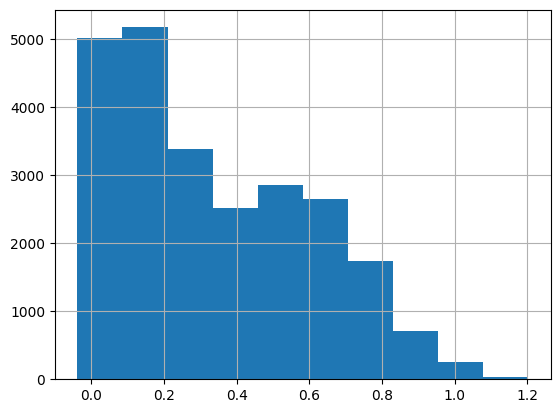

In [145]:
test_preds_series = pd.Series(test_predictions)

test_preds_series.hist()

In [146]:
from sklearn.metrics import precision_recall_curve,auc, roc_auc_score
precision, recall, thresholds = precision_recall_curve(y_test,test_preds_series)
auc(recall,precision)

0.29584066604285036

In [147]:
roc_auc_score(y_test,test_preds_series)

0.8511243608964126